In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import FaceToolKit as ftk
import DetectionToolKit as dtk
import PIL


In [2]:
verification_threshhold = 1.00
image_size = 160
v = ftk.Verification()
# Pre-load model for Verification
v.load_model("./models/20180204-160909/")
v.initial_input_output_tensors()




Model directory: ./models/20180204-160909/
Metagraph file: model-20180204-160909.meta
Checkpoint file: model-20180204-160909.ckpt-266000

'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Restoring parameters from ./models/20180204-160909/model-20180204-160909.ckpt-266000



In [3]:
import tensorflow as tf
tf.reset_default_graph()
d = dtk.Detection()





Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.



In [4]:
import os

In [5]:
def img_to_encoding(img):
    image = plt.imread(img)
    aligned = d.align(image, False)[0]
    #plt.show(aligned)
    return v.img_to_encoding(aligned, image_size)

In [32]:
face_database = {}



for images in os.listdir('imges'):
    identity = os.path.splitext(os.path.basename(images))[0]

    face_database[identity]=img_to_encoding(os.path.join('imges',images))



In [33]:
face_database

{'Amir Khan': array([ 0.105795  , -0.00296973, -0.01442808, -0.01124587, -0.05680819,
        -0.16602798, -0.06511346, -0.1158566 ,  0.01019283, -0.13395941,
        -0.0224626 ,  0.02748943, -0.14355472,  0.10225493, -0.17812349,
        -0.00840797,  0.06756377,  0.03115916, -0.00583652, -0.00126325,
        -0.13175979, -0.1422663 ,  0.03441393,  0.00298882, -0.05271686,
         0.08464579, -0.12272389,  0.0609101 ,  0.01363003, -0.06736628,
        -0.03052693,  0.00570764, -0.01406644,  0.02394017, -0.07467093,
         0.04288145, -0.05470137, -0.11988606,  0.01236193, -0.03709821,
        -0.06616854,  0.09600672,  0.0065268 , -0.07169822,  0.00241904,
        -0.04465422,  0.0403205 ,  0.03324592,  0.04442136, -0.09696239,
        -0.02709067,  0.1313363 ,  0.10987731, -0.15001878, -0.20124543,
         0.18039799, -0.00038449, -0.15802832, -0.05759517,  0.06590477,
        -0.04122593, -0.08325372, -0.06142638,  0.0518696 , -0.08358683,
         0.08779072, -0.11427744,  0.0

In [8]:
import pickle

In [34]:
f=open('face_database.pkl', 'wb')
pickle.dump(face_database, f)
f.close()

In [35]:
file = open("face_database.pkl",'rb')
facedb = pickle.load(file)

In [36]:
from PIL import Image

In [37]:
for (name, db_enc) in facedb.items():
    print(name,db_enc)


Amir Khan [ 0.105795   -0.00296973 -0.01442808 -0.01124587 -0.05680819 -0.16602798
 -0.06511346 -0.1158566   0.01019283 -0.13395941 -0.0224626   0.02748943
 -0.14355472  0.10225493 -0.17812349 -0.00840797  0.06756377  0.03115916
 -0.00583652 -0.00126325 -0.13175979 -0.1422663   0.03441393  0.00298882
 -0.05271686  0.08464579 -0.12272389  0.0609101   0.01363003 -0.06736628
 -0.03052693  0.00570764 -0.01406644  0.02394017 -0.07467093  0.04288145
 -0.05470137 -0.11988606  0.01236193 -0.03709821 -0.06616854  0.09600672
  0.0065268  -0.07169822  0.00241904 -0.04465422  0.0403205   0.03324592
  0.04442136 -0.09696239 -0.02709067  0.1313363   0.10987731 -0.15001878
 -0.20124543  0.18039799 -0.00038449 -0.15802832 -0.05759517  0.06590477
 -0.04122593 -0.08325372 -0.06142638  0.0518696  -0.08358683  0.08779072
 -0.11427744  0.09016863  0.04910634 -0.04639322 -0.07886479 -0.08998387
 -0.01023969 -0.06094795  0.09341357  0.06637698  0.11679607  0.12097357
 -0.03368171  0.12255646 -0.18769827 -0.0

In [15]:
def distance(emb1, emb2):
    diff = np.subtract(emb1, emb2)
    return np.sum(np.square(diff))

def verify(image_path, identity, database):
    encoding = img_to_encoding(image_path) 
    dist = distance(encoding, database[identity])
    if dist < verification_threshhold:
        print("It's " + str(identity) + ", welcome!")
    else:
        print("It's not " + str(identity) + ", Not That Person")
    
    return dist

In [16]:
def who_is_it(image_path, database):
    encoding = img_to_encoding(image_path)
    min_dist = 1000
    for (name, db_enc) in database.items():
        dist = distance(encoding, db_enc)
        if min_dist > dist:
            min_dist = dist
            identity = name
            
    
    fig = plt.figure(figsize=(10,10))
    if min_dist > verification_threshhold:
        print("Not in the database.")
    else:
            path=os.path.join("imgdata",str(identity)+".jpg")
            img=Image.open(image_path)
            img2=Image.open(path)

            ax1 = fig.add_subplot(2,2,1)
            ax1.imshow(img)
            ax2 = fig.add_subplot(2,2,2)
            ax2.imshow(img2)
            ax1.text(0.5,-0.1, "(a)image given", size=12, ha="center", transform=ax1.transAxes)
            ax2.text(0.5,-0.1, "(b) image in database", size=12, ha="center",transform=ax2.transAxes)
            print ("it's " + str(identity) + ", Dissimlarity =" + str(min_dist) )
        
    return min_dist, identity

it's Ranbir_singh_, Dissimlarity =0.9868130850973105


(0.9868130850973105, 'Ranbir_singh_')

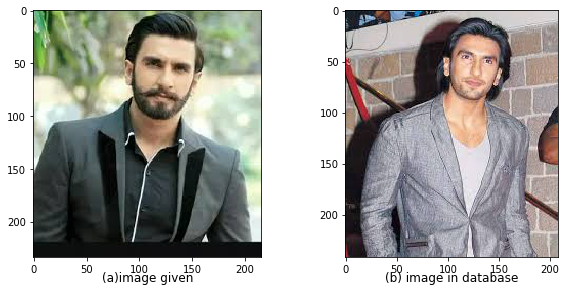

In [294]:
who_is_it("Ranbir_singh_with_beard.jpg", facedb)


In [285]:
count=0

for files in os.listdir("test_images"):
    p=os.path.join("test_images",files)
    _,name=check_accuracy(p,facedb)
    id1=name.split("_")
    id2=files.split("_")
    
    if int(id2[0])<740:
        print(id1[0][:5],id2[0])
        if id1[0][:5]==id2[0]:
            count+=1
    else:
        
        l="images"+id2[0]
        print(id1[0],l)
        if id1[0]==l:
            count+=1

    
    
    

NameError: name 'check_accuracy' is not defined

In [ ]:
acc=(count)/(len((os.listdir("test_images"))))


In [154]:
print("accuracy of model is : {} ".format(acc*100))

accuracy of model is : 0.0 


In [286]:
file = open("face_database.pkl",'rb')
database = pickle.load(file)

In [287]:
def add_to_database(images,database):
    db={}
    identity = os.path.splitext(os.path.basename(images))[0]

    db[identity]=img_to_encoding(os.path.join('imgdata',images))
    database.update(db)

    f=open('face_database.pkl', 'wb')
    pickle.dump(database, f)
    f.close()
    return database
    

In [289]:
new_db=add_to_database("Ranbir_singh_.jpg",facedb)


In [290]:
file = open("face_database.pkl",'rb')
facedb = pickle.load(file)